<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model </br>

In [93]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline  

Found GPU at: /device:GPU:0


In [3]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#Code to check connection and usage of GPU

In [4]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.7770887679999987
GPU (s):
0.041040175999995654
GPU speedup over CPU: 67x


# Build Network  
##Q1.1

In [5]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


5


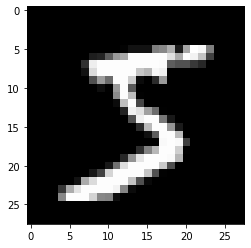

In [7]:
print(y_train[0])

# Lets its print an image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# So y_train has the label and X_train has its vectorial representation

##Library for Model Definition

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# Build Sequential Model
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(10)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

Check:
param_number = output_channel_number * (input_channel_number + 1)

Dense layer 1 = 1024 * [784 + 1] = 803840 

Dense layer 2 = 1024*1025 = 1049600

Intuition is that its the connections ( Weights ) between the two layers that are to be trained.

In [21]:

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

I used Relu cause it adds sparsity and also reduces vanishing gradients. Relu will straightaway remove a few features that are not useful. This I feel helps in many ways like reducing training time, reducing features considered ( more sparse ).

In [22]:

model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train,epochs = 50, batch_size = 256 )

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0160 - accuracy: 0.9968
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0150 - accuracy: 0.9969
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0183 - accuracy: 0.9964
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0086 - accuracy: 0.9981
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0156 - accuracy: 0.9973
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0109 - accuracy: 0.9978
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0215 - accuracy: 0.9962
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9979
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0048 - accuracy: 0.9989

In [48]:
accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1477 - accuracy: 0.9820


In [49]:
print("The Accuracy of the Model is {}".format(accuracy[-1]))

The Accuracy of the Model is 0.9819999933242798


In [50]:
y_pred = model.predict(X_test)

In [67]:
y_pred.shape


(10000, 10)

Lets take First Output of the y_pred and lets plot its image and highest prediction and check if its right

In [52]:
y_pred[1]

array([2.6077278e-18, 5.1599317e-21, 1.0000000e+00, 1.0053807e-17,
       1.2996818e-22, 6.8790832e-31, 6.4418867e-19, 2.4213116e-12,
       1.1612875e-21, 2.4839748e-35], dtype=float32)

As we can see index 3 is highest (aka label 2)
</br>
Now lets plot its image

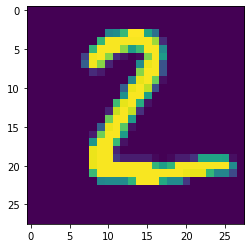

In [53]:
plt.imshow(X_test[1])


In [73]:
print(y_pred[1].argmax())


2


In [77]:
type(y_pred)

numpy.ndarray

## 1.3

Index of the chosen values ( agrsort on columns ( col is the label )
[8343 8342 8338 2707 8335 4935 2703 4937 2714 4999]
[4729 4732 8166 8164 4733 8159 2982  767  663 8090]
[ 609 8174  186 3945  612 2910 2904 8168 3932 3655]
[2086 6382 5606 8939 8561 6381 4925 6690 9430 9511]
[2804 5832 4929 9344 3534 7125 9347 1864 5159  475]
[ 395 7077 9159 9160 5229 7067 2247 7057 5222 9119]
[4388 6842 9207 9210 6846 1569 4347 4346 9195 9999]
[6119 6069 6089 9151 6098  254 9147  255 6079    0]
[2949 6839 6838 6834 2152 6826 6816 1170 3348 1118]
[9250 5220 8066 9254 5219  954 5645 6682 5233  599]
____________________________________________________________________________________________________
Plots : 




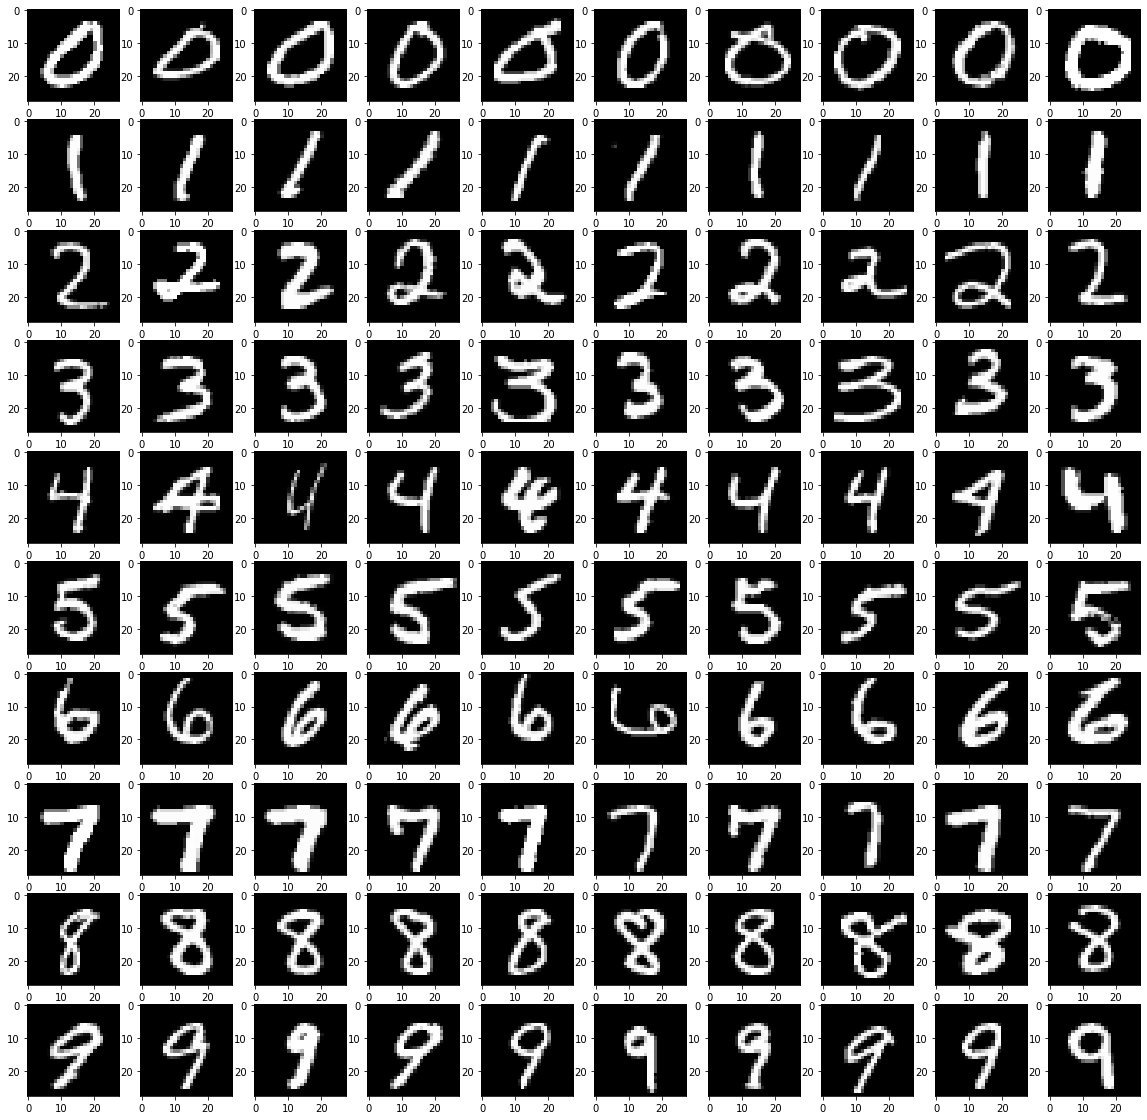

In [88]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)

#range fxn starts from 0 
print("Index of the chosen values ( agrsort on columns ( col is the label )")
for i in range(10):
  chosen = y_pred[:,i].argsort()[-10:][::1]
  print(chosen)
  for j in range(10):
    axs[i,j].imshow(X_test[chosen[j]], cmap=plt.get_cmap('gray'))

print("____"*25)
print("Plots : \n\n")
plt.show()

##1.4

In [89]:
y_pred_hlast = model.layers[-2].output
print(y_pred)

[[0.0000000e+00 7.4485358e-32 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.6077278e-18 5.1599317e-21 1.0000000e+00 ... 2.4213116e-12
  1.1612875e-21 2.4839748e-35]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.8411914e-37
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.5869903e-27]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0491718e-34 5.4449119e-33 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [90]:
y_pred_hlast.shape

TensorShape([None, 1024])

In [106]:
from keras import backend

inputs = model.input                                           
outputs = model.layers[-2].output                                     
functors = [backend.function([inputs], [outputs])]    

test_outputs = [func([X_test[0:10000]]) for func in functors]

In [107]:
print(test_outputs)


[[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]]


In [108]:
np_test_outputs = np.array(test_outputs)
type(np_test_outputs)
print(np_test_outputs.shape)

(1, 1, 10000, 1024)


In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 1024)              803840    
                                                                 
 dense_24 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_25 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_26 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 10)               

In [114]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="dense_27").output,
)

features = feature_extractor(X_test)



In [115]:
features.shape

TensorShape([10000, 1024])

In [116]:
type(features)

tensorflow.python.framework.ops.EagerTensor